In [1]:
!git clone https://github.com/2301730207Sudhanshu/underground-subway-nox-monitoring-system.git

Cloning into 'underground-subway-nox-monitoring-system'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 2.91 MiB | 7.47 MiB/s, done.


In [2]:
import os
os.chdir("underground-subway-nox-monitoring-system")

In [4]:
!pip install numpy pandas matplotlib scikit-learn

In [5]:
import pickle

model = pickle.load(open("nox_rf_model.pkl", "rb"))

print("✅ Model Loaded Successfully")

✅ Model Loaded Successfully


In [8]:
print(model.feature_names_in_)

['no' 'no2' 'relativehumidity' 'temperature' 'wind_direction' 'wind_speed'
 'hour' 'day' 'weekday' 'month']


In [9]:
import numpy as np
import pandas as pd
import time

features = model.feature_names_in_

print("🚇 Real-Time NOx Monitoring Started\n")
print("Model expects features:", features)

while True:

    fake_values = []

    for col in features:

        if col in ["hour"]:
            fake_values.append(np.random.randint(0,24))

        elif col in ["day"]:
            fake_values.append(np.random.randint(1,31))

        elif col in ["weekday"]:
            fake_values.append(np.random.randint(0,7))

        elif col in ["month"]:
            fake_values.append(np.random.randint(1,12))

        else:
            fake_values.append(np.random.uniform(0,200))

    data = pd.DataFrame([fake_values], columns=features)

    prediction = model.predict(data)[0]

    print("\n📡 Sensor Data:")
    print(data)
    print("Prediction:", round(prediction,2))
    print("-"*50)

    time.sleep(3)

🚇 Real-Time NOx Monitoring Started

Model expects features: ['no' 'no2' 'relativehumidity' 'temperature' 'wind_direction' 'wind_speed'
 'hour' 'day' 'weekday' 'month']

📡 Sensor Data:
         no       no2  relativehumidity  temperature  wind_direction  \
0  85.74072  35.72679        125.810809   130.784206      198.888081   

   wind_speed  hour  day  weekday  month  
0   25.466509    14   28        6      1  
Prediction: 0.09
--------------------------------------------------

📡 Sensor Data:
           no         no2  relativehumidity  temperature  wind_direction  \
0  104.790339  152.249654        122.420205   146.943806      160.787051   

   wind_speed  hour  day  weekday  month  
0     6.68605    11    1        5      8  
Prediction: 0.14
--------------------------------------------------

📡 Sensor Data:
           no       no2  relativehumidity  temperature  wind_direction  \
0  175.470763  6.634759         91.326376    79.225576      105.220801   

   wind_speed  hour  day  wee

KeyboardInterrupt: 

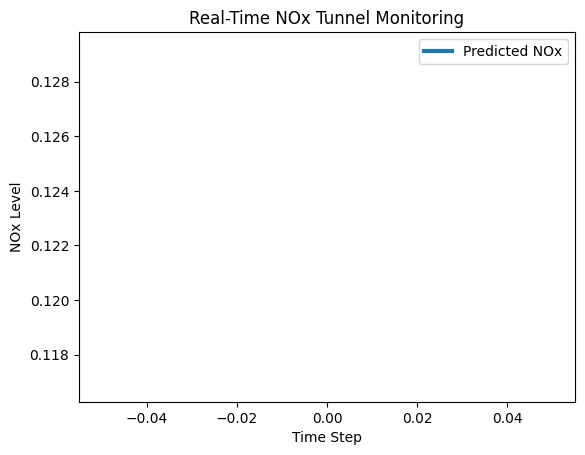

Predicted NOx: 0.12
✅ SAFE LEVEL
----------------------------------------


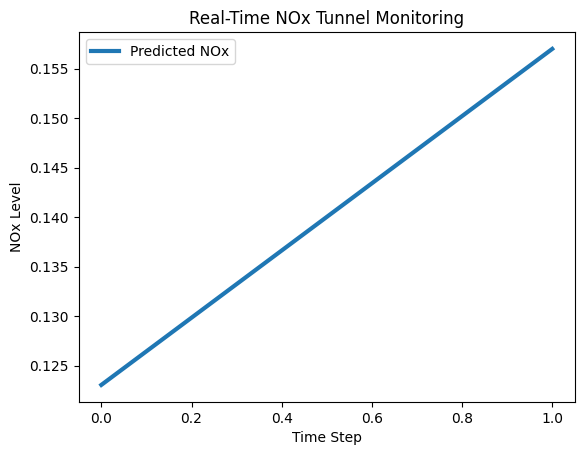

Predicted NOx: 0.16
✅ SAFE LEVEL
----------------------------------------


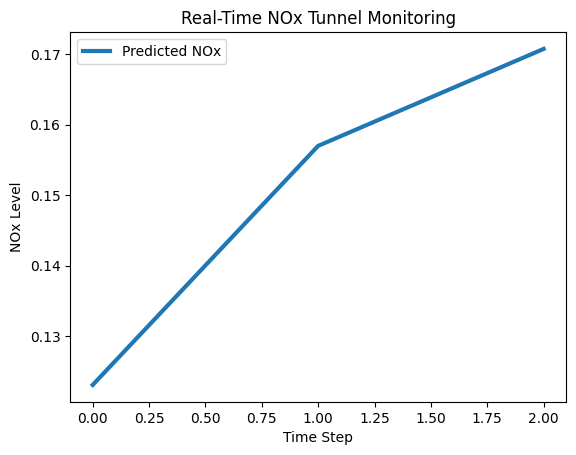

Predicted NOx: 0.17
✅ SAFE LEVEL
----------------------------------------


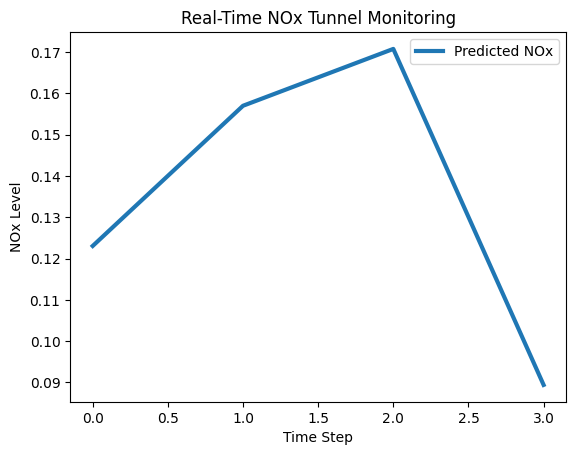

Predicted NOx: 0.09
✅ SAFE LEVEL
----------------------------------------


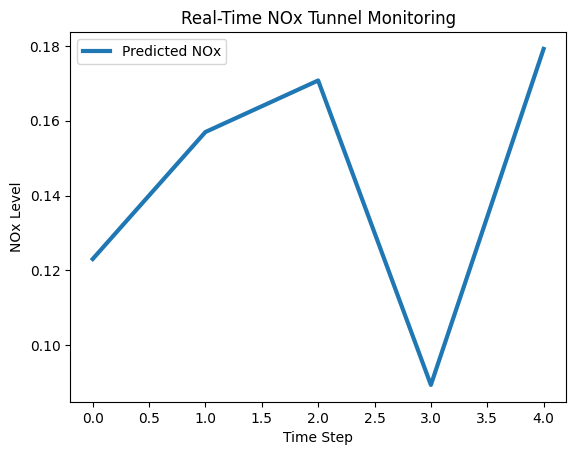

Predicted NOx: 0.18
✅ SAFE LEVEL
----------------------------------------


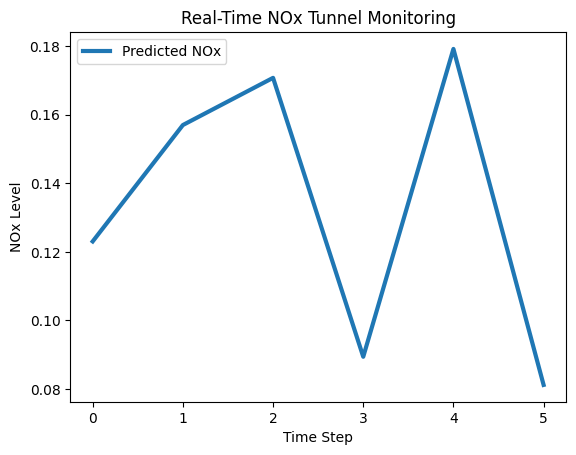

Predicted NOx: 0.08
✅ SAFE LEVEL
----------------------------------------


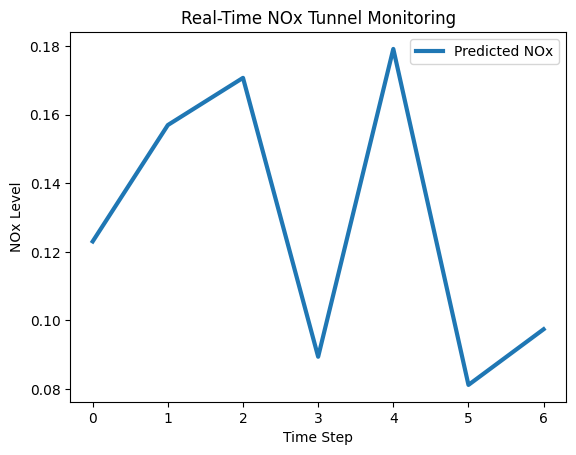

Predicted NOx: 0.1
✅ SAFE LEVEL
----------------------------------------


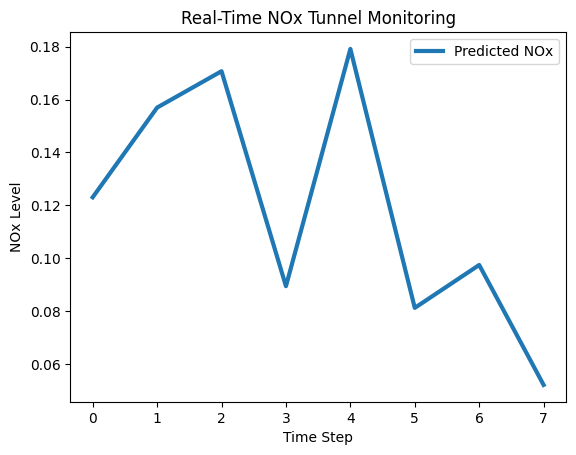

Predicted NOx: 0.05
✅ SAFE LEVEL
----------------------------------------


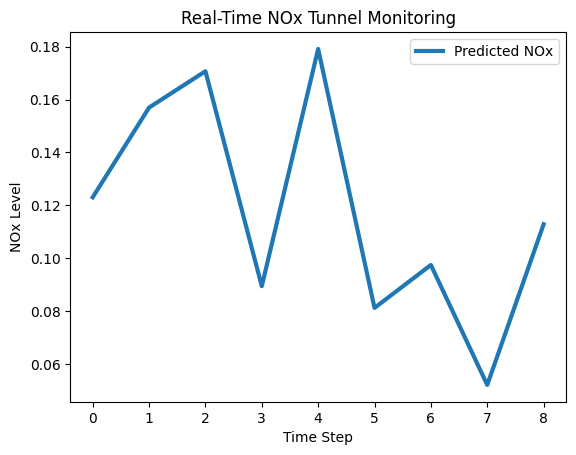

Predicted NOx: 0.11
✅ SAFE LEVEL
----------------------------------------


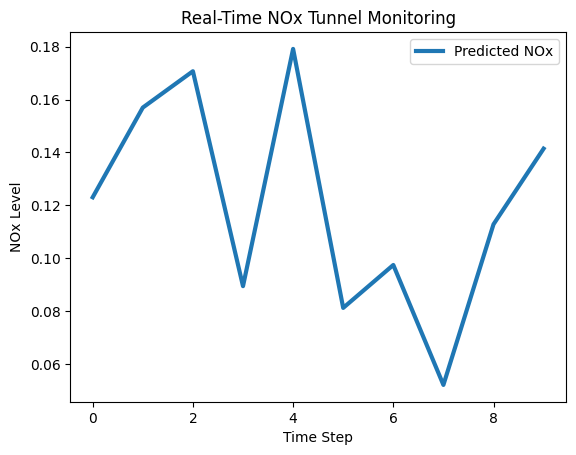

Predicted NOx: 0.14
✅ SAFE LEVEL
----------------------------------------


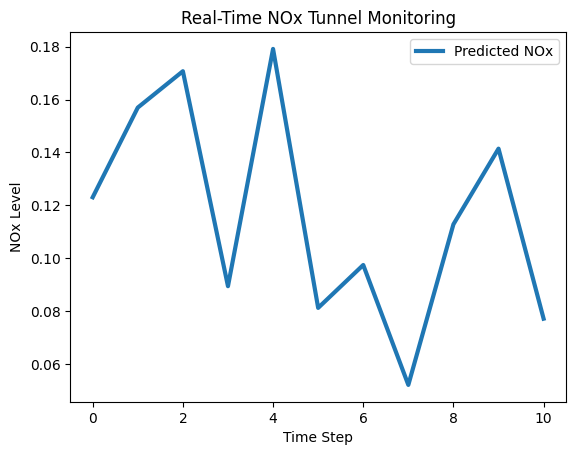

Predicted NOx: 0.08
✅ SAFE LEVEL
----------------------------------------


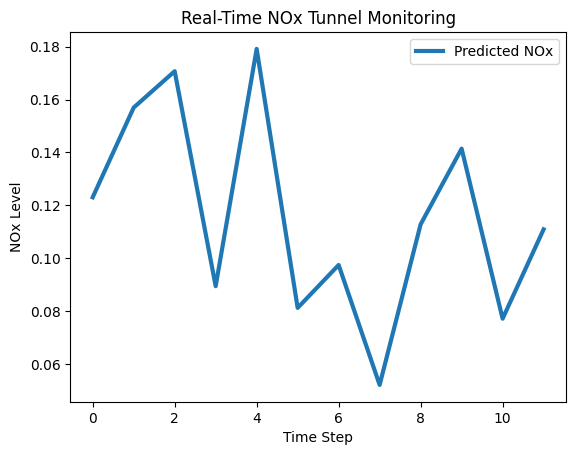

Predicted NOx: 0.11
✅ SAFE LEVEL
----------------------------------------


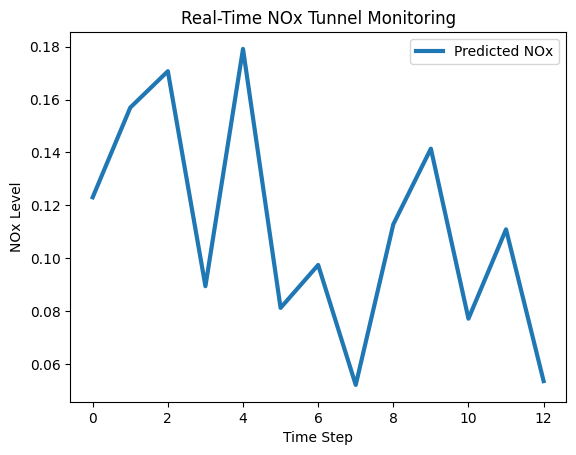

Predicted NOx: 0.05
✅ SAFE LEVEL
----------------------------------------


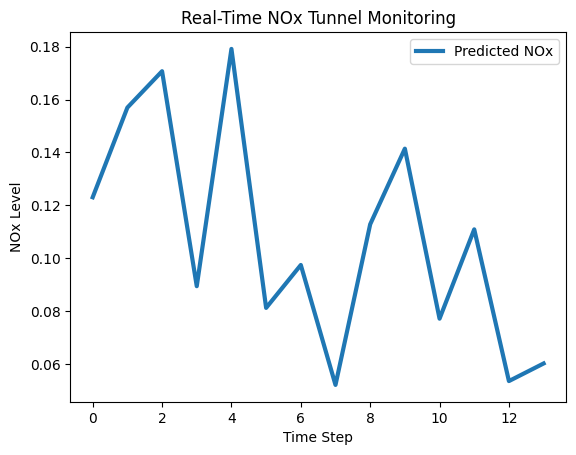

Predicted NOx: 0.06
✅ SAFE LEVEL
----------------------------------------


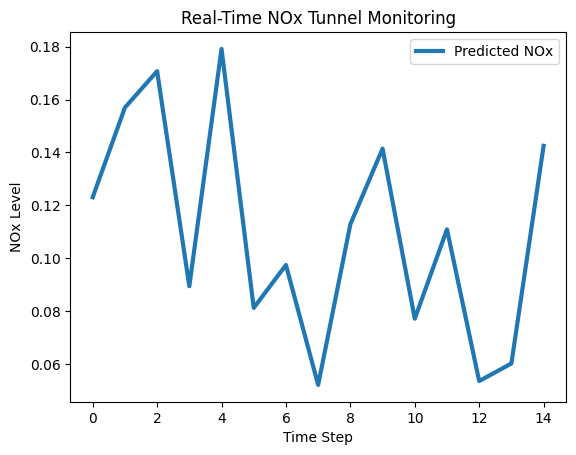

Predicted NOx: 0.14
✅ SAFE LEVEL
----------------------------------------


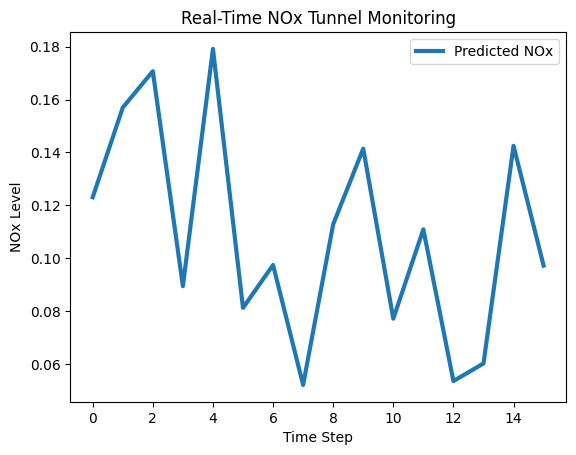

Predicted NOx: 0.1
✅ SAFE LEVEL
----------------------------------------


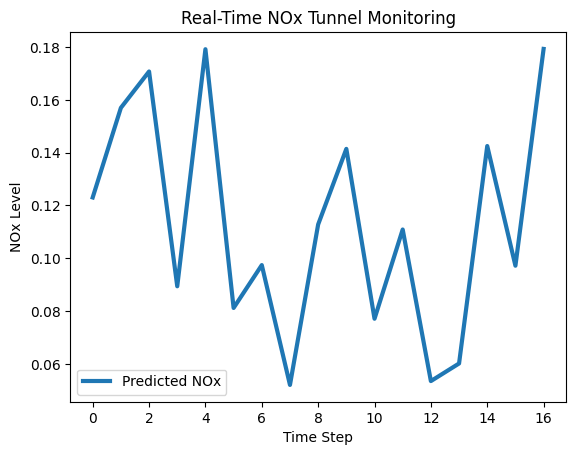

Predicted NOx: 0.18
✅ SAFE LEVEL
----------------------------------------


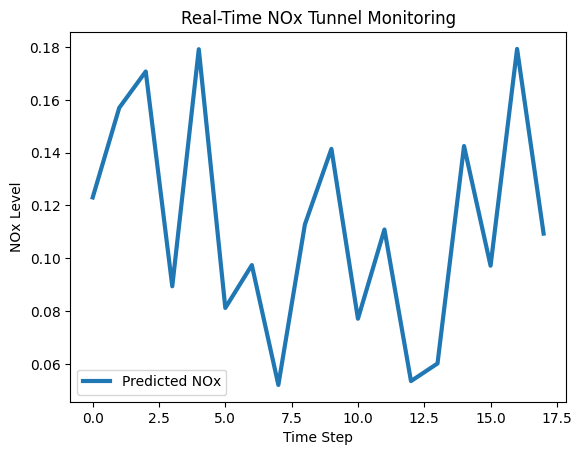

Predicted NOx: 0.11
✅ SAFE LEVEL
----------------------------------------


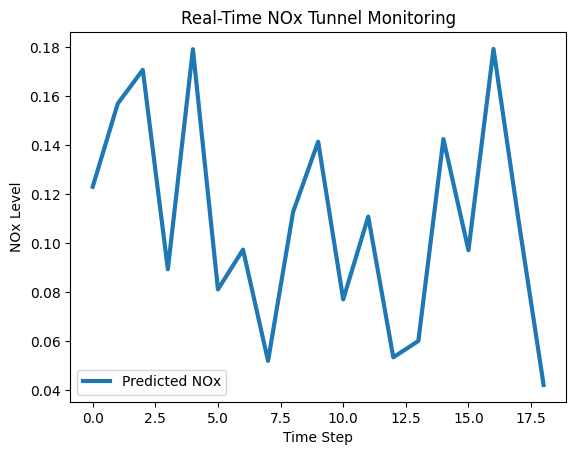

Predicted NOx: 0.04
✅ SAFE LEVEL
----------------------------------------


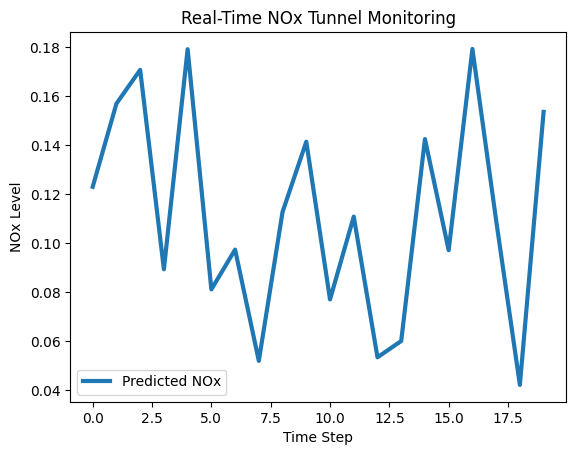

Predicted NOx: 0.15
✅ SAFE LEVEL
----------------------------------------


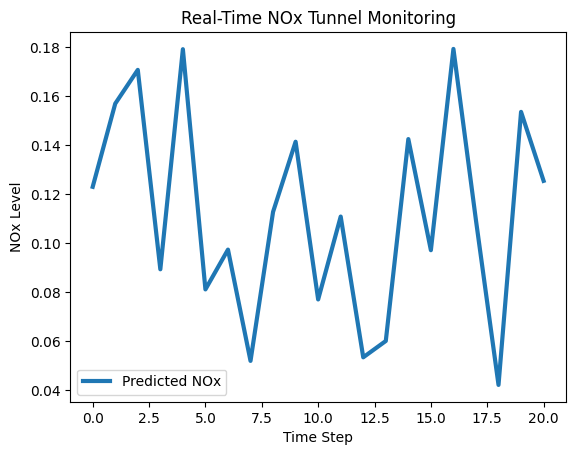

Predicted NOx: 0.13
✅ SAFE LEVEL
----------------------------------------


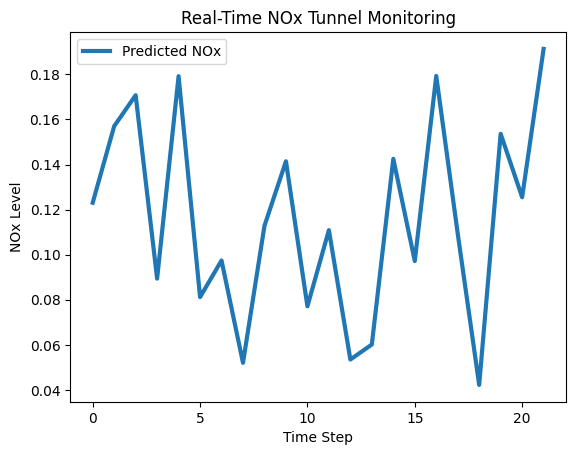

Predicted NOx: 0.19
✅ SAFE LEVEL
----------------------------------------


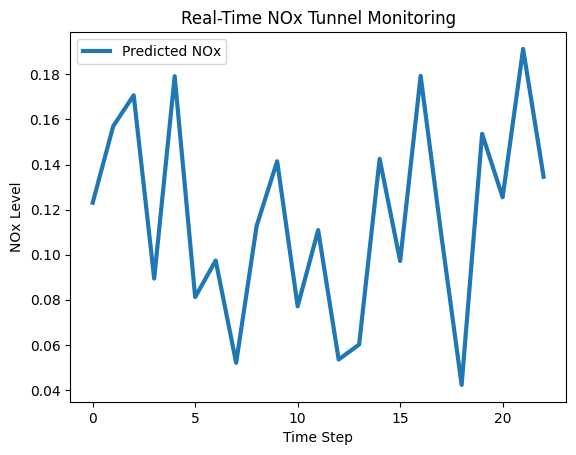

Predicted NOx: 0.13
✅ SAFE LEVEL
----------------------------------------


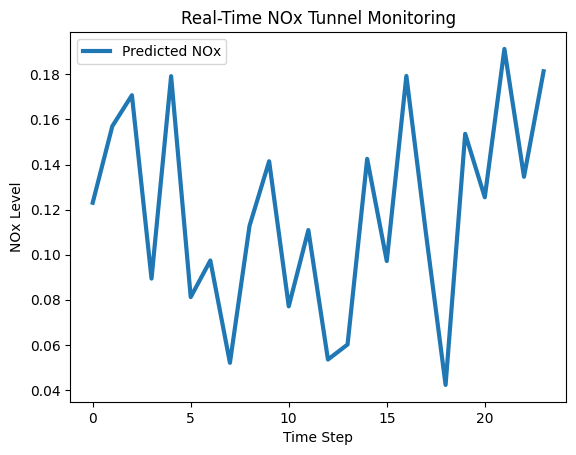

Predicted NOx: 0.18
✅ SAFE LEVEL
----------------------------------------


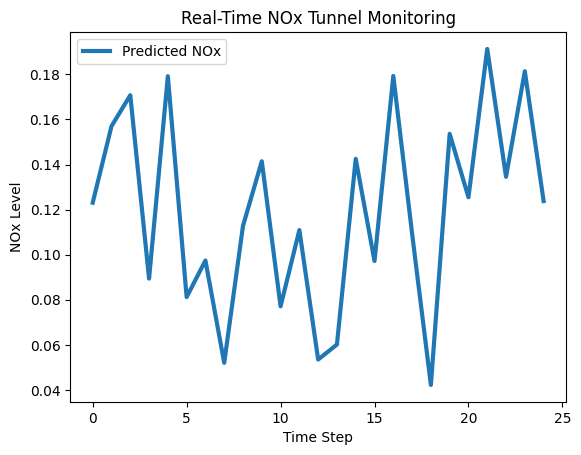

Predicted NOx: 0.12
✅ SAFE LEVEL
----------------------------------------


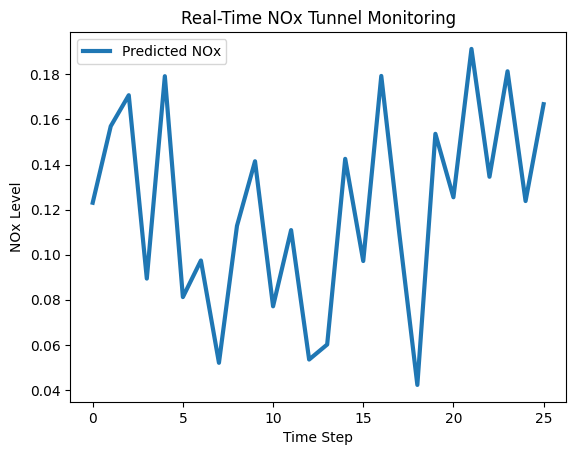

Predicted NOx: 0.17
✅ SAFE LEVEL
----------------------------------------


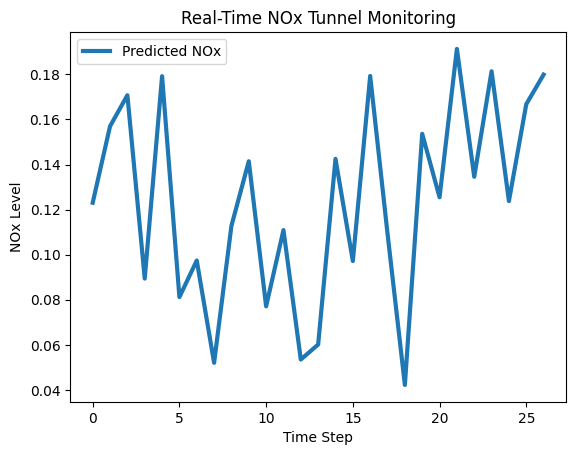

Predicted NOx: 0.18
✅ SAFE LEVEL
----------------------------------------


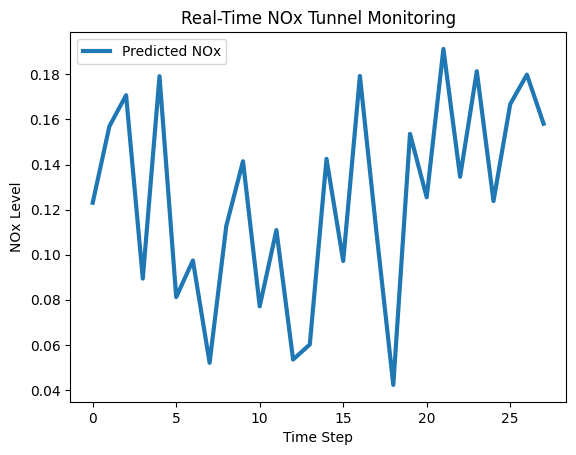

Predicted NOx: 0.16
✅ SAFE LEVEL
----------------------------------------


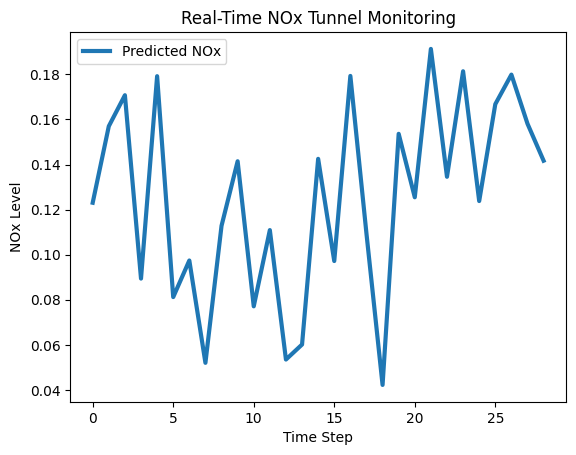

Predicted NOx: 0.14
✅ SAFE LEVEL
----------------------------------------


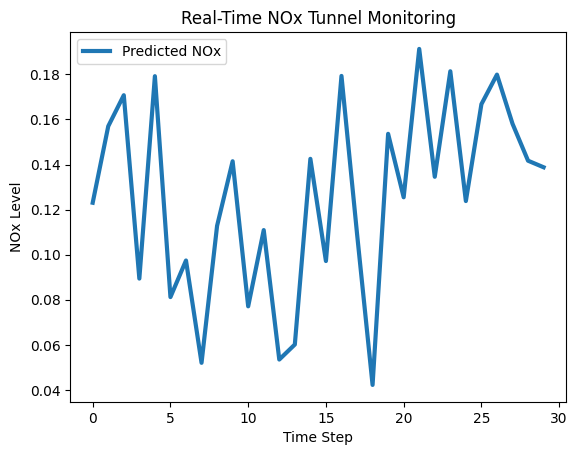

Predicted NOx: 0.14
✅ SAFE LEVEL
----------------------------------------


KeyboardInterrupt: 

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

features = model.feature_names_in_

nox_values = []
pred_values = []

plt.ion()

for i in range(50):

    fake_values = []

    for col in features:
        if col == "hour":
            val = np.random.randint(0,24)
        elif col == "day":
            val = np.random.randint(1,31)
        elif col == "weekday":
            val = np.random.randint(0,7)
        elif col == "month":
            val = np.random.randint(1,12)
        else:
            val = np.random.uniform(0,200)

        fake_values.append(val)

    data = pd.DataFrame([fake_values], columns=features)

    prediction = model.predict(data)[0]

    # Use predicted value for visualization
    nox_values.append(prediction)
    pred_values.append(prediction)

    plt.clf()
    plt.plot(nox_values, linewidth=3, label="Predicted NOx")
    plt.legend()
    plt.title("Real-Time NOx Tunnel Monitoring")
    plt.xlabel("Time Step")
    plt.ylabel("NOx Level")
    plt.pause(0.5)

    print("Predicted NOx:", round(prediction,2))

    if prediction > 80:
        print("🚨 DANGER: Unsafe NOx Level!")
    elif prediction > 40:
        print("⚠️ WARNING: Moderate Pollution")
    else:
        print("✅ SAFE LEVEL")

    print("-"*40)

    time.sleep(1)

plt.ioff()